In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown


# Truncamiento de Distribuciones

Este notebook explora el truncamiento de distribuciones continuas y discretas mediante tres métodos:
1. **Valores absolutos**: Se eliminan los valores fuera de un rango específico.
2. **Desviaciones estándar**: Se conservan solo los valores dentro de un cierto número de desviaciones estándar de la media.
3. **Percentiles**: Se truncan los valores en función de los percentiles seleccionados.

Cada método se analizará con gráficos y explicaciones detalladas.

In [4]:
# Definición de funciones para truncamiento
def truncate_absolute(data, lower, upper):
    return data[(data >= lower) & (data <= upper)]

def truncate_std(data, mean, std, n_std):
    lower = mean - n_std * std
    upper = mean + n_std * std
    return data[(data >= lower) & (data <= upper)]

def truncate_percentile(data, lower_p, upper_p):
    lower = np.percentile(data, lower_p)
    upper = np.percentile(data, upper_p)
    return data[(data >= lower) & (data <= upper)]


## Generación de Datos

Usamos una distribución normal (continua) y una de Poisson (discreta) para aplicar los métodos de truncamiento.

In [6]:
# Generación de datos para distribuciones
np.random.seed(42)
size = 10000
discrete_data = np.random.poisson(lam=5, size=size)
continuous_data = np.random.normal(loc=50, scale=15, size=size)

# Parámetros de las distribuciones
mean_cont, std_cont = np.mean(continuous_data), np.std(continuous_data)

# Aplicación de truncamiento a distribuciones
truncated_abs_disc = truncate_absolute(discrete_data, 3, 8)
truncated_abs_cont = truncate_absolute(continuous_data, 30, 70)
truncated_std_cont = truncate_std(continuous_data, mean_cont, std_cont, 2)
truncated_perc_cont = truncate_percentile(continuous_data, 5, 95)

def plot_distribution(original, truncated, title):
    plt.figure(figsize=(8, 4))
    sns.histplot(original, bins=30, kde=True, color='blue', alpha=0.5, label='Original')
    sns.histplot(truncated, bins=30, kde=True, color='red', alpha=0.7, label='Truncada')
    plt.title(title)
    plt.legend()
    plt.show()



## Truncamiento por Valores Absolutos

Se eliminan los valores fuera de un rango predefinido. Este método es útil cuando sabemos que ciertos valores son irrelevantes o inválidos en un contexto específico.

**Ejemplo:** Eliminamos valores menores a 30 y mayores a 70 en una distribución normal.

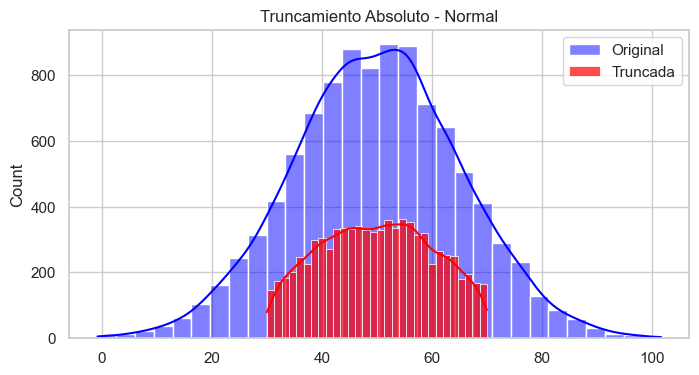

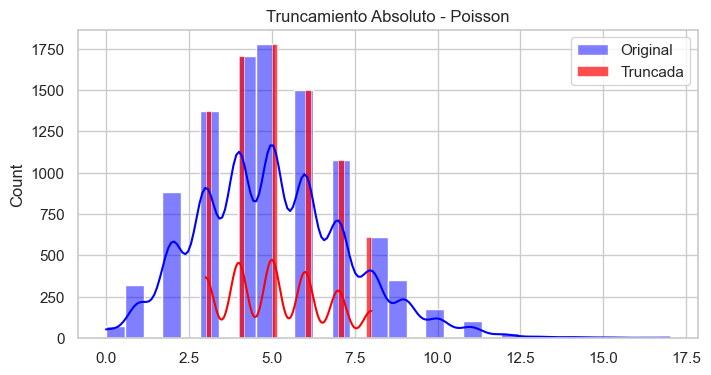

In [7]:
# Truncamiento por valores absolutos
plot_distribution(continuous_data, truncated_abs_cont, "Truncamiento Absoluto - Normal")
plot_distribution(discrete_data, truncated_abs_disc, "Truncamiento Absoluto - Poisson")

## Truncamiento por Desviaciones Estándar

Este método mantiene los valores dentro de un número determinado de desviaciones estándar desde la media. Es útil cuando queremos eliminar valores extremos basados en la dispersión de los datos.

**Ejemplo:** Truncamos los datos a 2 desviaciones estándar.

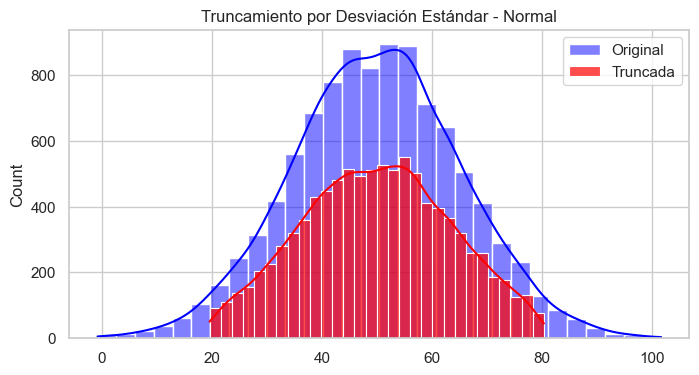

In [8]:
# Truncamiento por desviaciones estándar
plot_distribution(continuous_data, truncated_std_cont, "Truncamiento por Desviación Estándar - Normal")

## Truncamiento por Percentiles

El truncamiento por percentiles elimina los valores más bajos y más altos según la distribución acumulativa de los datos. Es útil cuando queremos trabajar solo con el rango central de los datos.

**Ejemplo:** Eliminamos los valores por debajo del percentil 5 y por encima del percentil 95.

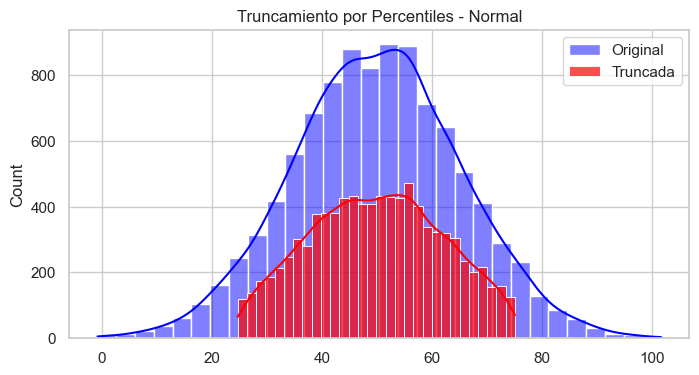

In [9]:
# Truncamiento por percentiles
plot_distribution(continuous_data, truncated_perc_cont, "Truncamiento por Percentiles - Normal")

# Conclusiones

- **El truncamiento absoluto** es útil cuando hay rangos definidos de interés.
- **El truncamiento por desviaciones estándar** es ideal para eliminar valores extremos basados en la dispersión.
- **El truncamiento por percentiles** permite filtrar valores extremos sin depender de la forma específica de la distribución.

Cada método tiene aplicaciones específicas, y la elección depende del contexto y los objetivos del análisis.